### Try It: Comparing Feature Selection Methods

In this module, you have seen two ways to select features.  The first approach is using sequential feature selection to sequentially add or delete features and only use those that improve the model.  The second approach is using a regularized model to identify features based on non-zero coefficients.  This activity focuses on comparing variations of both these methods.  

You will use both the `SequentialFeatureSelection` and `RFE` (recursive feature elimination) to build and compare regression models.  Consider the following 6 feature selection methods -- leave all other arguments to default besides the `estimator` and `n_features_to_select` arguments:

- `Ridge` regressor to extract coefficients
- `SequentialFeatureSelection` using the `Lasso` to select 4 features.
- `RFE` using `Lasso` to select 4 features.

For each of these, fit the training data `X_train`, `y_train` below.  Compare the magnitude of the results of your `Ridge` model to those that result from feature selection methods.  

#### The Data

For this problem a dataset with information on red wine chemical compositions and their quality is given.  Your goal is to use the properties of the wine to predict the quality.  Below, the data is loaded and train/test splits constructed.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!file -i /content/drive/MyDrive/MLAI_Haas/data/winequality-red.csv

/content/drive/MyDrive/MLAI_Haas/data/winequality-red.csv: text/csv; charset=us-ascii


In [4]:
df = pd.read_csv('/content/drive/MyDrive/MLAI_Haas/data/winequality-red.csv', sep = ',')

In [5]:
df.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [7]:
X = df.drop('quality', axis = 1)
y = df['quality']

<Axes: >

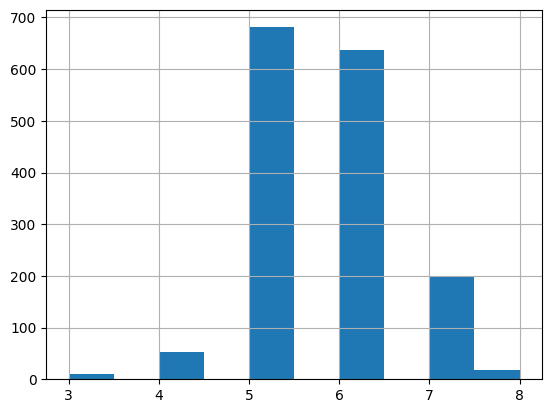

In [11]:
y.hist()

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [9]:
from sklearn.linear_model import Ridge, Lasso, LinearRegression
from sklearn.feature_selection import SequentialFeatureSelector, RFE
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


1. Ridge regressor to extract coefficients

In [12]:
#Build and fit Ridge regression model
ridge=Ridge()
ridge.fit(X_train, y_train)

#Predict y and report MSE
ridge_pred=ridge.predict(X_test)
ridge_mse=mean_squared_error(y_test, ridge_pred)

#Extract coefficient values and feature names and put into dataframe
ridge_coef_df=pd.DataFrame({'Feature': X_train.columns, 'Coef Value': ridge.coef_})

#Sort by coefficient values
ridge_coef_df = ridge_coef_df.sort_values('Coef Value', ascending=False)

#Answer check
print(f'Ridge coefficients: {np.round(ridge.coef_, 2)}')
print(f'Ridge MSE: {ridge_mse}')
ridge_coef_df

Ridge coefficients: [ 0.01 -1.03 -0.16  0.   -1.18  0.01 -0.   -0.01 -0.36  0.72  0.31]
Ridge MSE: 0.39099217285755505


,Feature,Coef Value
9,sulphates,0.717888
10,alcohol,0.307230
0,fixed acidity,0.012650
5,free sulfur dioxide,0.005134
3,residual sugar,0.000648
6,total sulfur dioxide,-0.003590
7,density,-0.014613
2,citric acid,-0.155604
8,pH,-0.355665
1,volatile acidity,-1.030705


2. SequentialFeatureSelection (SFS) using the Lasso to select 4 features

In [13]:
#Build a pipeline with SFS using Lasso
sfs_pipe = Pipeline([('sfs', SequentialFeatureSelector(estimator=Lasso(), n_features_to_select=4)), ('model', Ridge())])
sfs_pipe

Pipeline(steps=[('sfs',
                 SequentialFeatureSelector(estimator=Lasso(),
                                           n_features_to_select=4)),
                ('model', Ridge())])

In [15]:
#Build a pipeline with SFS using Lasso
sfs_pipe = Pipeline([('sfs', SequentialFeatureSelector(estimator=Lasso(), n_features_to_select=4)), ('model', Ridge())])

#Fit the model
sfs_pipe.fit(X_train, y_train)

#Predict y and report MSE
sfs_pred = sfs_pipe.predict(X_test)
sfs_mse=mean_squared_error(y_test, sfs_pred)

#Extract coefficient values and feature names and put into dataframe
sfs_coef=sfs_pipe.named_steps['model'].coef_
sfs_features=(X_test.columns[sfs_pipe.named_steps['sfs'].get_support()])

#Sort by coefficient values
sfs_coef_df=pd.DataFrame({'SFS Feature': sfs_features, 'Coef Value': sfs_coef})
sfs_coef_df = sfs_coef_df.sort_values('Coef Value', ascending=False)

#Answer check
sfs_pipe
print(f'SFS coefficients: {np.round(sfs_coef, 2)}')
print(f'SFS features selected: {(sfs_features)}')
print(f'SFS MSE: {sfs_mse}')
sfs_coef_df


SFS coefficients: [-0.01 -1.5   0.19 -0.  ]
SFS features selected: Index(['fixed acidity', 'volatile acidity', 'citric acid',
       'total sulfur dioxide'],
      dtype='object')
SFS MSE: 0.5034117791755206


,SFS Feature,Coef Value
2,citric acid,0.185801
3,total sulfur dioxide,-0.004550
0,fixed acidity,-0.009970
1,volatile acidity,-1.500357


3. Recursive feature elimination (RFE) using the Lasso to select four features

In [17]:
#Build a pipeline with RFE using Lasso
rfe_pipe = Pipeline([('rfe', RFE(estimator=Lasso(), n_features_to_select=4)), ('model', Ridge())])

#Fit the model
rfe_pipe.fit(X_train, y_train)

#Predict y and report MSE
rfe_pred = rfe_pipe.predict(X_test)
rfe_mse=mean_squared_error(y_test, rfe_pred)

#Extract coefficient values and feature names and put into dataframe
rfe_coef=rfe_pipe.named_steps['model'].coef_
rfe_features=(X_test.columns[rfe_pipe.named_steps['rfe'].get_support()])

#Sort by coefficient values
rfe_coef_df=pd.DataFrame({'RFE Feature': rfe_features, 'Coef Value': rfe_coef})
rfe_coef_df = rfe_coef_df.sort_values('Coef Value', ascending=False)

#Answer check
rfe_pipe
print(f'RFE coefficients: {np.round(rfe_coef, 2)}')
print(f'RFE features selected: {(rfe_features)}')
print(f'RFE MSE: {rfe_mse}')
rfe_coef_df

RFE coefficients: [-0.   -0.52  0.78  0.36]
RFE features selected: Index(['total sulfur dioxide', 'pH', 'sulphates', 'alcohol'], dtype='object')
RFE MSE: 0.441475359717979


,RFE Feature,Coef Value
2,sulphates,0.784305
3,alcohol,0.355506
0,total sulfur dioxide,-0.002889
1,pH,-0.520745


Compare the magnitude of the results of your Ridge model to those that result from feature selection methods.

The simple ridge regression model had the lowest mean squared error (MSE) of .39. It used all the available features and so it was possible to see which ones were having a positive influence on the quality score vs a negative influence. (Note that we weren’t told whether a low quality score represents a high quality wine or low quality wine, all I can say is how these coefficients influence the score).

For example, this model identified the top three factors increasing the quality score were sulphates, alcohol, and fixed acidity, while the top three factors decreasing the quality score were pH, volatile acidity and chlorides.

We tried two types of feature selection to identify the most important features prior to estimating the ridge regression model, sequential feature selection (SFS) and recursive feature elimination (RFE). The RFE model had the lowest MSE (.44) and identified two positive features (sulphates and alcohol) and two negative (total sulphur dioxide and pH). These were all identified as important by the simple Ridge as well, but it's interesting that total sulphur dioxide played a stronger role with this method.

The RFE had the highest MSE (.50), and identified one positive feature (citric acid), and three negative ones (total sulphur dioxide, fixed acidity, and volatile acidity). Only one of these was identified as important by Ridge, and none by SFS.

The magnitudes of the coefficients were similar in all three models, for example, total sulphur dioxide was always very small and negative (~-.002). I suspect that if we had calculated the p-values for these features in the simple Ridge model, they would have been identified as statistically significant, and that is why they were identified by the feature selection methods. It is surprising how different the features selected by each method were. I wish we had more time to delve into why.
